# <font color=gold> <b>Hồi quy phi tuyến tính (Non-Linear Regression)
---
### <font color=b> Nếu dữ liệu cho thấy một xu hướng cong, thì hồi quy tuyến tính (linear regression) sẽ không tạo ra kết quả chính xác khi so sánh với hồi quy phi tuyến tính bởi vì, như tên của nó, hồi quy tuyến tính cho rằng dữ liệu là tuyến tính. Hãy cùng tìm hiểu về hồi quy phi tuyến tính và áp dụng một ví dụ trên python. Trong sổ tay này, chúng ta sẽ huấn luyện một mô hình phi tuyến tính phù hợp với các điểm dữ liệu tương ứng với GDP của Trung Quốc từ năm 1960 đến năm 2014.

## <font color=b><b>Thêm các thư viện cần thiết
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### <font color=b> Mặc dù hồi quy tuyến tính rất tốt để giải quyết nhiều vấn đề, nhưng nó không thể được sử dụng cho tất cả các bộ dữ liệu. Đầu tiên hãy nhớ lại cách hồi quy tuyến tính, có thể mô hình hóa một tập dữ liệu. Nó mô hình hóa mối quan hệ tuyến tính giữa một biến phụ thuộc y và biến độc lập x. Nó có một phương trình đơn giản, bậc 1, ví dụ $y = 2x + 3$.

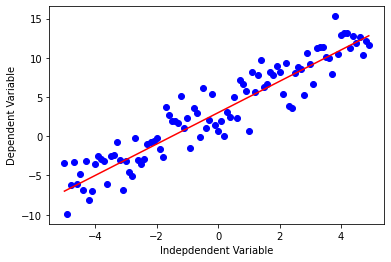

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
# plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### <font color=b> Hồi quy phi tuyến tính là mối quan hệ giữa các biến độc lập $x$ và một biến phụ thuộc $y$, kết quả là dữ liệu được mô hình hóa bởi một hàm phi tuyến tính. Về cơ bản, bất kỳ mối quan hệ nào không tuyến tính đều có thể được gọi là phi tuyến tính và thường được biểu diễn bằng đa thức bậc $k$ (lũy thừa tối đa của $x$). Ví dụ với $k = 3$:
### $$y = a x^3 + b x^2 + c x + d$$

### Các hàm phi tuyến tính có thể có các phần tử như hàm mũ, logarit, phân số và các phần tử khác. Ví dụ:
### $$y = \log(x)$$

### Hoặc thậm chí, phức tạp hơn như:
### $$y = \log(a x^3 + b x^2 + c x + d)$$

### Chúng ta hãy xem xét đồ thị của một hàm số bậc ba.


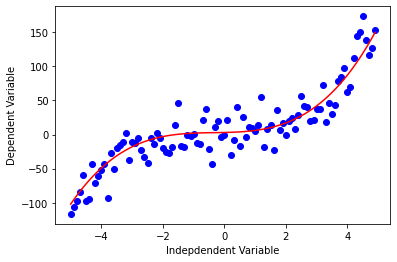

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### <font color=b> Như bạn thấy, hàm này có $x^3$ và $x^2$ là các biến độc lập. Ngoài ra, đồ thị của hàm này không phải là một đường thẳng trên mặt phẳng 2D. Vì vậy, đây là một hàm phi tuyến tính.

### Một số loại hàm phi tuyến tính khác là:

## <font color=b> <b>Hàm bậc hai (Quadratic)
### $$Y = X^2$$

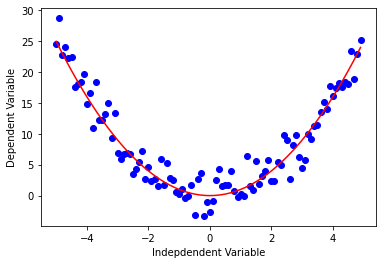

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## <font color=b> <b>Hàm mũ (Exponential)
### Một hàm mũ với cơ số c được xác định bởi
### $$Y = a + b c^X$$
### trong đó b ≠ 0, c > 0, c ≠ 1, và x là một số thực bất kỳ. Cơ số c là hằng số và số mũ x là một biến.

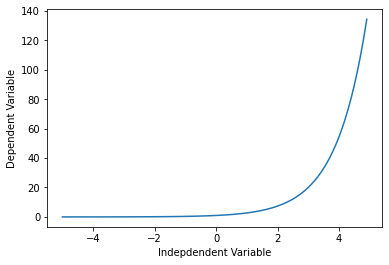

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## <font color=b> <b>Hàm logarit (Logarithmic)
### Giá trị trả về của $y$ là kết quả của việc áp dụng ánh xạ logarit từ đầu vào $x$ đến biến đầu ra $y$. Đây là một trong những dạng đơn giản nhất của log():
### $$y = \log(x)$$

### Thay vì dùng $x$, chúng ta có thể sử dụng $X$, có thể là biểu diễn đa thức của $x$. Ở dạng tổng quát, nó sẽ được viết là

### $$\begin{equation}y = \log(X)\end{equation}$$

C:\Users\Admin\AppData\Local\Temp/ipykernel_20312/2209287329.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


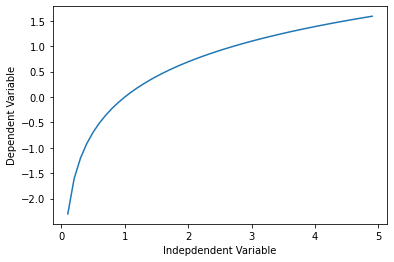

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## <font color=b> <b>Hàm Sigmoidal/Logistic
### $$Y = a + \frac{b}{1+ c^{(X-d)}}$$

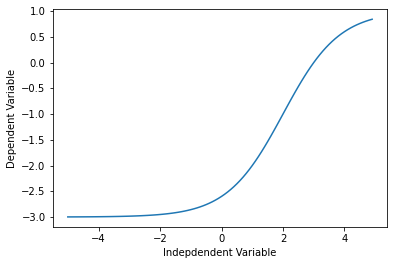

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## <font color=b> <b>Ví dụ về hồi quy phi tuyến tính
---
### Ví dụ: chúng ta sẽ thử huấn luyện một mô hình phi tuyến tính với các điểm dữ liệu tương ứng với GDP của Trung Quốc từ năm 1960 đến năm 2014. Chúng ta tải xuống tập dữ liệu có hai cột: cột đầu tiên là một giá trị năm từ 1960 đến 2014, cột thứ hai là tổng thu nhập quốc nội hàng năm tương ứng của Trung Quốc tính bằng đô la Mỹ trong năm đó.

In [8]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O dataset/china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("dataset/china_gdp.csv")
df.head(10)

2021-09-30 00:35:50 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "dataset/china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## <font color=b> <b>Vẽ tập dữ liệu
### Đây là hình ảnh các điểm dữ liệu trông như thế nào. Nó giống như một hàm logistic hoặc hàm mũ. Sự tăng trưởng bắt đầu chậm, sau đó từ năm 2005 trở đi, sự tăng trưởng rất đáng kể. Và cuối cùng, nó giảm tốc một chút trong những năm 2010.

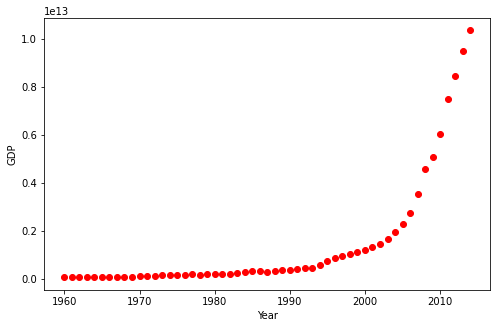

In [9]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## <font color=b> <b>Chọn một mô hình
### Từ cái nhìn ban đầu về biểu đồ trên, chúng ta xác định rằng hàm logistic có thể là một xấp xỉ tốt, vì nó có đặc tính là bắt đầu với tốc độ tăng trưởng chậm, tăng trưởng tăng ở giữa và sau đó giảm lại ở cuối; như minh họa bên dưới:

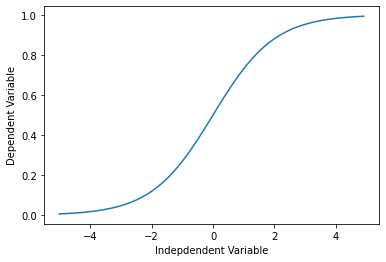

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### <font color=b>Công thức cho hàm logistic như sau:
### $$\hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$
### $\beta_1$: Kiểm soát độ dốc của đường cong,
### $\beta_2$: Trượt đường cong trên trục x.

## <font color=b> <b>Xây dựng mô hình
### Bây giờ, hãy xây dựng mô hình hồi quy của chúng ta và khởi tạo các tham số của nó.

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(Beta_1*(x-Beta_2)))
     return y

### <font color=b> Hãy xem thử một đường sigmoid mẫu có thể phù hợp với dữ liệu:

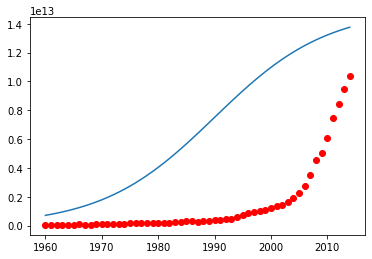

In [12]:
beta_1 = -0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15e12)
plt.plot(x_data, y_data, 'ro')

### <font color=b>Nhiệm vụ của chúng ta bây giờ là tìm ra các thông số tốt nhất cho mô hình của chúng ta. Nhưng trước tiên chúng ta cần chuẩn hóa x và y:

In [13]:
# Lets normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

### <font color=b> <b>Làm thế nào để tìm ra các thông số tốt nhất cho đường huấn luyện của chúng ta?

### Chúng ta có thể sử dụng **curve_fit** sử dụng kỹ thuật bình phương nhỏ nhất phi tuyến tính để điều chỉnh hàm sigmoid của chúng ta gần với dữ liệu, tối ưu các giá trị cho các tham số để tổng các phần dư bình phương của sigmoid (xdata, *popt) - ydata được giảm thiểu.

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = -690.450283, beta_2 = 0.997207


### <font color=b>Bây giờ chúng ta vẽ lại mô hình hồi quy và kết quả như hình bên dưới:

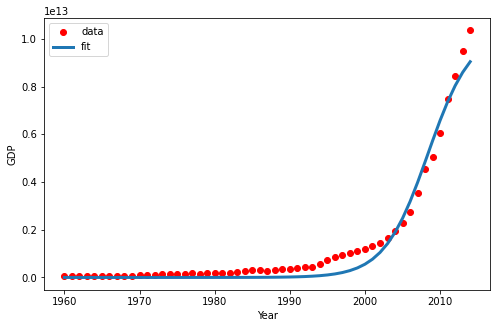

In [15]:
y_hat = sigmoid(xdata, *popt)
y_hat *= max(y_data)

plt.figure(figsize=(8,5))
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data, y_hat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## <font color=b> <b>Thực hành
---

### <font color=b>Bạn có thể tính toán độ chính xác của mô hình của chúng ta là bao nhiêu không?

In [16]:
# write your code here
# msk = np.random.rand(len(df)) < 0.8
# train_x = xdata[msk]
# test_x = xdata[~msk]
# train_y = ydata[msk]
# test_y = ydata[~msk]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(xdata, ydata, test_size=0.25, random_state=42)

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.031038
Residual sum of squares (MSE): 0.001318
R2-score: 0.976240
